                                  name       id    align         eye  \
0            Spider-Man (Peter Parker)   Secret     Good  Hazel Eyes   
1      Captain America (Steven Rogers)   Public     Good   Blue Eyes   
2  Wolverine (James \"Logan\" Howlett)   Public  Neutral   Blue Eyes   
3    Iron Man (Anthony \"Tony\" Stark)   Public     Good   Blue Eyes   
4                  Thor (Thor Odinson)  No Dual     Good   Blue Eyes   

         hair gender  gsm              alive  appearances first_appear  \
0  Brown Hair   Male  NaN  Living Characters       4043.0       Aug-62   
1  White Hair   Male  NaN  Living Characters       3360.0       Mar-41   
2  Black Hair   Male  NaN  Living Characters       3061.0       Oct-74   
3  Black Hair   Male  NaN  Living Characters       2961.0       Mar-63   
4  Blond Hair   Male  NaN  Living Characters       2258.0       Nov-50   

  publisher  
0    marvel  
1    marvel  
2    marvel  
3    marvel  
4    marvel  
<class 'pandas.core.frame.DataFrame'>


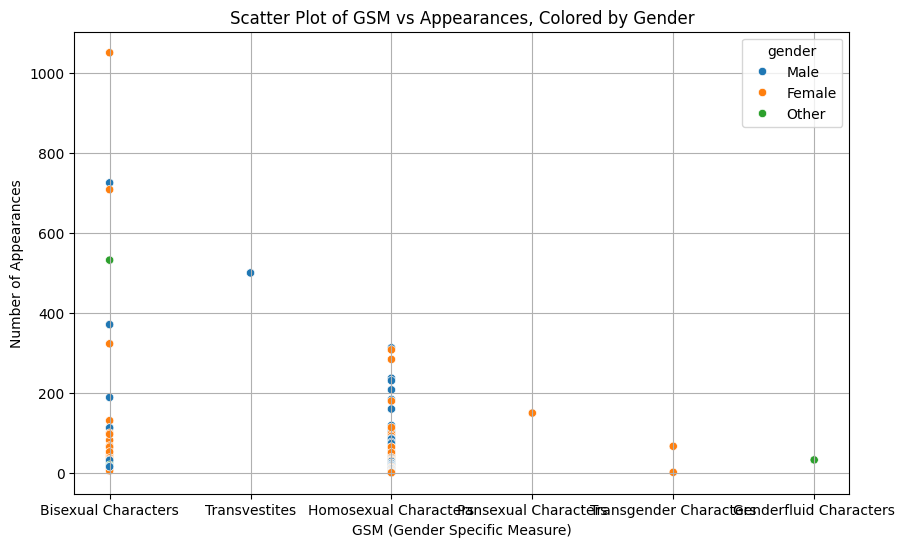

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


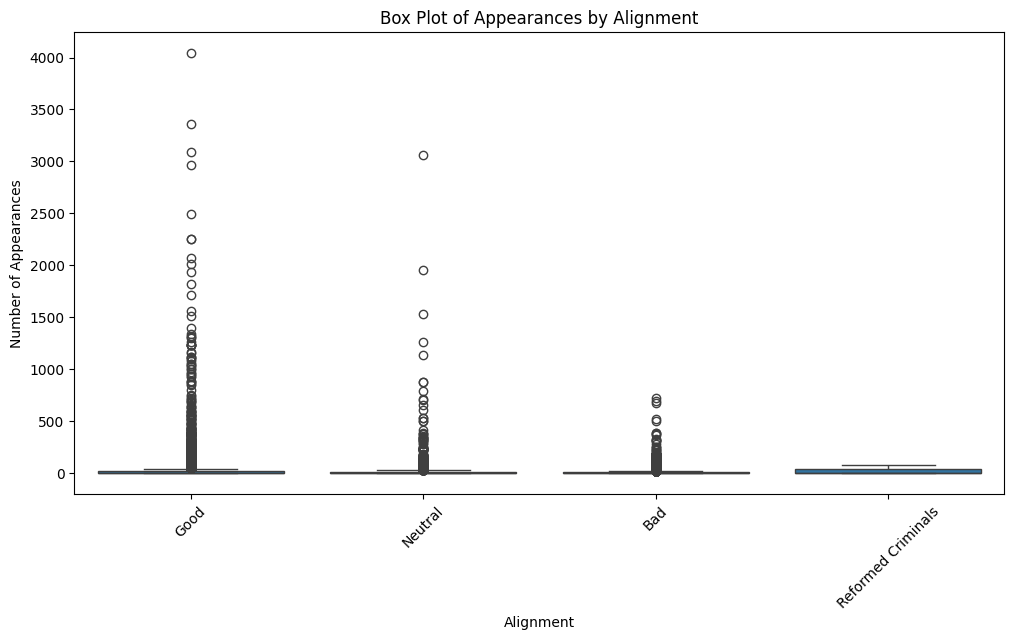

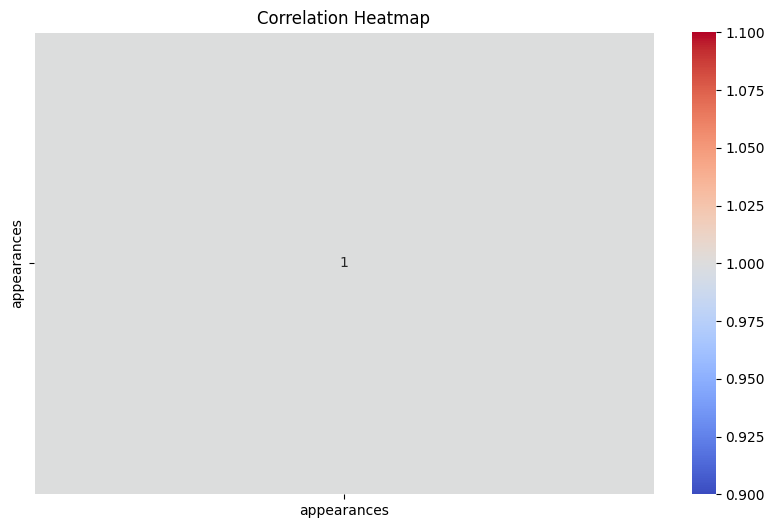

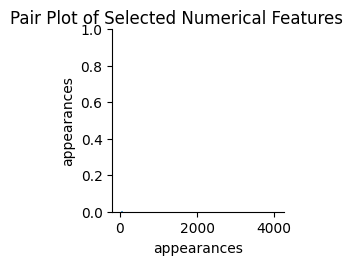

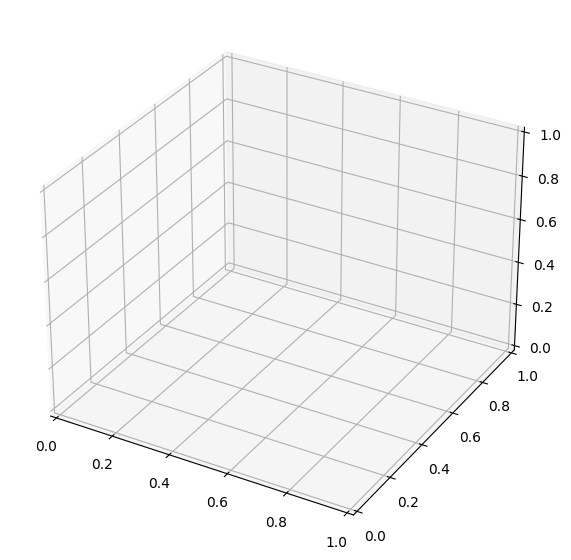

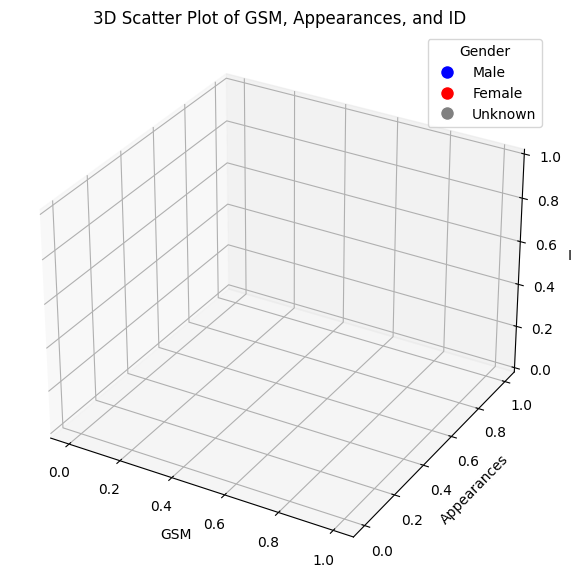

<ipython-input-15-0242c858703e>:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', 2)


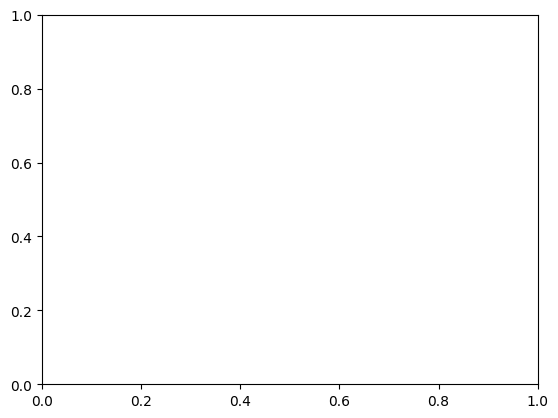

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the given URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/refs/heads/main/Data/comics.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Get basic information about the dataset
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

# Scatter plot for 'gsm' vs 'appearances'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gsm', y='appearances', hue='gender', data=df)
plt.title('Scatter Plot of GSM vs Appearances, Colored by Gender')
plt.xlabel('GSM (Gender Specific Measure)')
plt.ylabel('Number of Appearances')
plt.grid(True)
plt.show()

# Box plot for 'align' vs 'appearances'
plt.figure(figsize=(12, 6))
sns.boxplot(x='align', y='appearances', data=df)
plt.title('Box Plot of Appearances by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.show()

# Select only the numerical columns for correlation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Heatmap for the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pair plot for selected numerical columns
sns.pairplot(df[['gsm', 'appearances']])  # Adjust this based on available numerical columns
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot for three numerical variables (if available)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
url = "https://raw.githubusercontent.com/salemprakash/EDA/refs/heads/main/Data/comics.csv"
df = pd.read_csv(url)

# Ensure columns are numeric
df['gsm'] = pd.to_numeric(df['gsm'], errors='coerce')  # Convert to numeric, coercing errors to NaN
df['appearances'] = pd.to_numeric(df['appearances'], errors='coerce')  # Convert to numeric, coercing errors to NaN
df['id'] = pd.to_numeric(df['id'], errors='coerce')  # Convert to numeric, coercing errors to NaN

# Remove rows with NaN values after conversion
df.dropna(subset=['gsm', 'appearances', 'id', 'gender'], inplace=True)

# 3D Scatter Plot for GSM, Appearances, and ID
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define colors for genders
colors = []
for gender in df['gender']:
    if gender == 'Male':
        colors.append('blue')
    elif gender == 'Female':
        colors.append('red')
    else:
        colors.append('gray')  # Default color for unknown gender

# Create a scatter plot
sc = ax.scatter(df['gsm'], df['appearances'], df['id'], c=colors, marker='o')

ax.set_xlabel('GSM')
ax.set_ylabel('Appearances')
ax.set_zlabel('ID')
ax.set_title('3D Scatter Plot of GSM, Appearances, and ID')

# Adding a legend
blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Male', markerfacecolor='blue', markersize=10)
red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Female', markerfacecolor='red', markersize=10)
gray_patch = plt.Line2D([0], [0], marker='o', color='w', label='Unknown', markerfacecolor='gray', markersize=10)

plt.legend(handles=[blue_patch, red_patch, gray_patch], loc='upper right', title='Gender')

plt.show()


# Adding a color bar for gender
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

cmap = cm.get_cmap('coolwarm', 2)
norm = plt.Normalize(0, 1)

sc = ax.scatter(df['gsm'], df['appearances'], df['id'], c=df['gender'].map({'Male': 0, 'Female': 1}), cmap=cmap, marker='o')
plt.colorbar(sc, ticks=[0, 1], label='Gender (0: Male, 1: Female)')

plt.show()
